# Description

This is the same notebook in `nbs/99_manuscript` but adapted for a poster at ISMB 2022.

Make plots to show the computational complexity results comparing all coefficients.

# Modules loading

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from ccc import conf

# Settings

In [2]:
INPUT_FILENAME_TEMPLATE = "time_test"

# Paths

In [3]:
assert (
    conf.MANUSCRIPT["BASE_DIR"] is not None and conf.MANUSCRIPT["BASE_DIR"].exists()
), "Manuscript dir not set"

In [4]:
COEF_COMP_DIR = conf.MANUSCRIPT["FIGURES_DIR"] / "coefs_comp"
COEF_COMP_DIR.mkdir(parents=True, exist_ok=True)
display(COEF_COMP_DIR)

PosixPath('/opt/manuscript/content/images/coefs_comp')

In [5]:
OUTPUT_FIGURE_DIR = conf.MANUSCRIPT["FIGURES_DIR"] / "ismb2022" / "poster_figures"
OUTPUT_FIGURE_DIR.mkdir(parents=True, exist_ok=True)
display(OUTPUT_FIGURE_DIR)

PosixPath('/opt/manuscript/content/images/ismb2022/poster_figures')

In [6]:
INPUT_DIR = conf.RESULTS_DIR / "time_test"
display(INPUT_DIR)

PosixPath('/opt/data/results/time_test')

# Load results

In [7]:
time_results = pd.read_pickle(INPUT_DIR / f"{INPUT_FILENAME_TEMPLATE}.pkl")

In [8]:
time_results.shape

(10600, 4)

In [9]:
time_results.head()

,data_size,method,time,sim
0,100,p-1,0.000232,-0.115117
1,100,p-1,0.000160,-0.050567
2,100,p-1,0.000129,0.215785
3,100,p-1,0.000114,0.020045
4,100,p-1,0.000123,0.053343


In [10]:
time_results["method"].unique()

array(['p-1', 's-1', 'cm-1', 'mic_e-1', 'mic-1', 'p-3', 's-3', 'cm-3',
       'mic_e-3', 'mic-3'], dtype=object)

# Processing

In [11]:
time_results = time_results.replace(
    {
        "method": {
            "p-1": "Pearson (1 core)",
            "s-1": "Spearman (1 core)",
            "cm-1": "CCC (1 core)",
            "mic-1": "MIC (1 core)",
            "mic_e-1": "MICe (1 core)",
            "p-3": "Pearson (3 cores)",
            "s-3": "Spearman (3 cores)",
            "cm-3": "CCC (3 cores)",
            "mic-3": "MIC (3 cores)",
            "mic_e-3": "MICe (3 cores)",
        }
    }
)

In [12]:
time_results.shape

(10600, 4)

In [13]:
time_results.head()

,data_size,method,time,sim
0,100,Pearson (1 core),0.000232,-0.115117
1,100,Pearson (1 core),0.000160,-0.050567
2,100,Pearson (1 core),0.000129,0.215785
3,100,Pearson (1 core),0.000114,0.020045
4,100,Pearson (1 core),0.000123,0.053343


# Run numbers

In [14]:
plot_data = time_results

In [15]:
run_numbers = (
    plot_data[
        plot_data["method"].str.contains("1 core", regex=False)
        | plot_data["method"].str.contains("CCC (3 cores)", regex=False)
    ]
    .groupby(["data_size", "method"])["time"]
    .describe()
)
display(run_numbers)

count       mean       std        min  \
data_size method                                                      
100       CCC (1 core)       1000.0   0.003436  0.000357   0.002792   
          CCC (3 cores)      1000.0   0.002805  0.000316   0.002583   
          MIC (1 core)       1000.0   0.001585  0.000072   0.001357   
          MICe (1 core)      1000.0   0.001501  0.000069   0.001327   
          Pearson (1 core)   1000.0   0.000072  0.000010   0.000068   
          Spearman (1 core)  1000.0   0.000491  0.000042   0.000473   
500       CCC (1 core)         10.0   0.006613  0.000143   0.006428   
          CCC (3 cores)        10.0   0.004261  0.000447   0.003709   
          MIC (1 core)         10.0   0.025260  0.000415   0.024730   
          MICe (1 core)        10.0   0.021278  0.000747   0.020741   
          Pearson (1 core)     10.0   0.000078  0.000008   0.000074   
          Spearman (1 core)    10.0   0.000574  0.000026   0.000561   
1000      CCC (1 core)         10.0   0.011435  0.000180   0.011137   
          CCC (3 cores)        10.0   0.006138  0.000521   0.005639   
          MIC (1 core)         10.0   0.079122  0.001332   0.077585   
          MICe (1 core)        10.0   0.059901  0.000900   0.058993   
          Pearson (1 core)     10.0   0.000083  0.000009   0.000078   
          Spearman (1 core)    10.0   0.000646  0.000022   0.000636   
5000      CCC (1 core)         10.0   0.047655  0.000344   0.047145   
          CCC (3 cores)        10.0   0.021006  0.000191   0.020833   
          MIC (1 core)         10.0   1.112159  0.004618   1.103153   
          MICe (1 core)        10.0   0.557650  0.002108   0.554018   
          Pearson (1 core)     10.0   0.000106  0.000010   0.000101   
          Spearman (1 core)    10.0   0.001255  0.000041   0.001218   
10000     CCC (1 core)         10.0   0.095417  0.000847   0.094640   
          CCC (3 cores)        10.0   0.040655  0.000300   0.040217   
          MIC (1 core)         10.0   5.063873  0.016328   5.044594   
          MICe (1 core)        10.0   1.404940  0.004390   1.398780   
          Pearson (1 core)     10.0   0.000133  0.000009   0.000129   
          Spearman (1 core)    10.0   0.002105  0.000036   0.002060   
50000     CCC (1 core)         10.0   0.505978  0.002688   0.502278   
          CCC (3 cores)        10.0   0.211265  0.001060   0.210206   
          MICe (1 core)        10.0  11.996720  0.033999  11.936845   
          Pearson (1 core)     10.0   0.000397  0.000081   0.000360   
          Spearman (1 core)    10.0   0.011653  0.000324   0.011165   
100000    CCC (1 core)         10.0   1.058219  0.010537   1.047975   
          CCC (3 cores)        10.0   0.443743  0.005329   0.438674   
          Pearson (1 core)     10.0   0.000772  0.000185   0.000700   
          Spearman (1 core)    10.0   0.025262  0.000186   0.024976   
1000000   CCC (1 core)         10.0  13.137387  0.053015  13.045537   
          CCC (3 cores)        10.0   6.281456  0.071677   6.142177   
          Pearson (1 core)     10.0   0.013941  0.000920   0.013189   
          Spearman (1 core)    10.0   0.356550  0.003803   0.352625   

                                   25%        50%        75%        max  
data_size method                                                         
100       CCC (1 core)        0.003150   0.003359   0.003709   0.005698  
          CCC (3 cores)       0.002698   0.002760   0.002853   0.008883  
          MIC (1 core)        0.001537   0.001581   0.001625   0.002157  
          MICe (1 core)       0.001457   0.001499   0.001539   0.002010  
          Pearson (1 core)    0.000070   0.000070   0.000071   0.000232  
          Spearman (1 core)   0.000477   0.000479   0.000484   0.000977  
500       CCC (1 core)        0.006485   0.006634   0.006750   0.006768  
          CCC (3 cores)       0.003906   0.004193   0.004532   0.004966  
          MIC (1 core)        0.024830   0.025406   0.025475   0.025844  
          MICe (1 co

# Plot

In [16]:
hue_order = sorted(time_results["method"].unique())

In [17]:
hue_order

['CCC (1 core)',
 'CCC (3 cores)',
 'MIC (1 core)',
 'MIC (3 cores)',
 'MICe (1 core)',
 'MICe (3 cores)',
 'Pearson (1 core)',
 'Pearson (3 cores)',
 'Spearman (1 core)',
 'Spearman (3 cores)']

In [18]:
deep_colors = sns.color_palette("muted")
display(deep_colors)

[(0.2823529411764706, 0.47058823529411764, 0.8156862745098039),
 (0.9333333333333333, 0.5215686274509804, 0.2901960784313726),
 (0.41568627450980394, 0.8, 0.39215686274509803),
 (0.8392156862745098, 0.37254901960784315, 0.37254901960784315),
 (0.5843137254901961, 0.4235294117647059, 0.7058823529411765),
 (0.5490196078431373, 0.3803921568627451, 0.23529411764705882),
 (0.8627450980392157, 0.49411764705882355, 0.7529411764705882),
 (0.4745098039215686, 0.4745098039215686, 0.4745098039215686),
 (0.8352941176470589, 0.7333333333333333, 0.403921568627451),
 (0.5098039215686274, 0.7764705882352941, 0.8862745098039215)]

In [19]:
def format_data_size(x):
    if x < 1000:
        return f"{int(x)}"
    elif x < 1000000:
        return f"{int(x/1000)}k"

    return f"{int(x/1000000)}m"


plot_data = plot_data.assign(data_size=plot_data["data_size"].apply(format_data_size))

## First analysis

Here I take a look if using more than 1 core benefits methods.

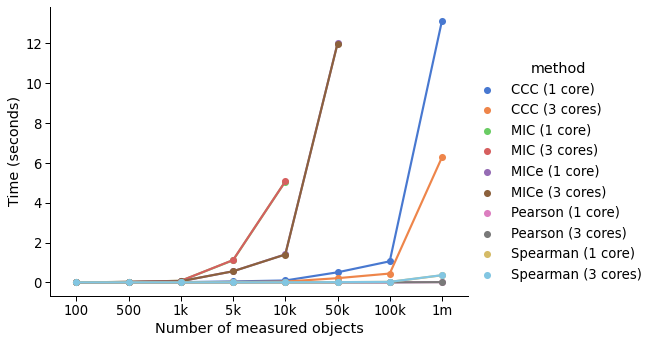

In [20]:
with sns.plotting_context("paper", font_scale=1.5):
    g = sns.catplot(
        kind="point",
        data=plot_data,
        x="data_size",
        y="time",
        hue="method",
        hue_order=hue_order,
        palette=deep_colors,
        height=5,
        aspect=1.4,
    )

    plt.xlabel("Number of measured objects")
    plt.ylabel("Time (seconds)")

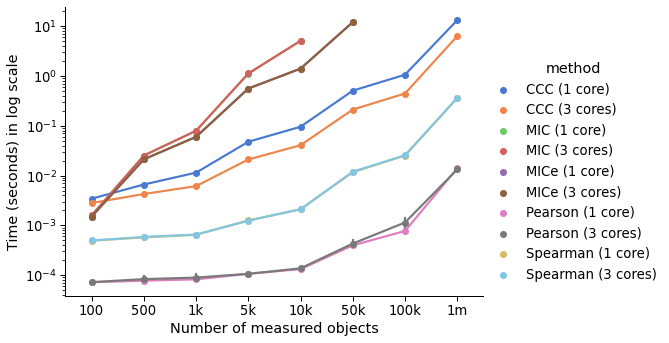

In [21]:
with sns.plotting_context("paper", font_scale=1.5):
    g = sns.catplot(
        kind="point",
        data=plot_data,
        x="data_size",
        y="time",
        hue="method",
        hue_order=hue_order,
        palette=deep_colors,
        height=5,
        aspect=1.4,
    )

    plt.xlabel("Number of measured objects")
    plt.ylabel("Time (seconds) in log scale")

    g.ax.set_yscale("log")

Only CCC is really taking advantage of more than 1 core, so I'll remove the rest below.

# Final analysis

In [22]:
# select runs with 3 cores for the other methods
plot_data = plot_data.replace(
    {
        "method": {
            "Pearson (3 cores)": "Pearson",
            "Spearman (3 cores)": "Spearman",
            "MIC (3 cores)": "MIC",
            "MICe (3 cores)": r"$\mathregular{MIC_e}$",
        }
    }
)

In [23]:
plot_data["method"].unique()

array(['Pearson (1 core)', 'Spearman (1 core)', 'CCC (1 core)',
       'MICe (1 core)', 'MIC (1 core)', 'Pearson', 'Spearman',
       'CCC (3 cores)', '$\\mathregular{MIC_e}$', 'MIC'], dtype=object)

In [26]:
hue_order = [
    # "MIC",
    r"$\mathregular{MIC_e}$",
    # "CCC (1 core)",
    "CCC (3 cores)",
    "Spearman",
    "Pearson",
]

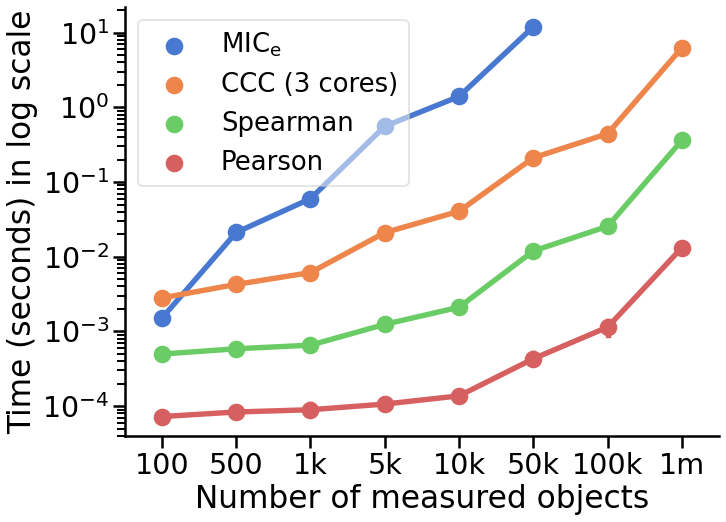

In [32]:
with sns.plotting_context("poster", font_scale=1.3):
    g = sns.catplot(
        kind="point",
        data=plot_data,
        x="data_size",
        y="time",
        hue="method",
        hue_order=hue_order,
        palette=deep_colors,
        height=8,
        aspect=1.30,
        legend=False,
    )

    plt.legend(loc="best", fontsize="small", framealpha=0.5)
    plt.xlabel("Number of measured objects")
    plt.ylabel("Time (seconds) in log scale")
    g.ax.set_yscale("log")

    plt.savefig(
        OUTPUT_FIGURE_DIR / f"{INPUT_FILENAME_TEMPLATE}-log.pdf",
        bbox_inches="tight",
        facecolor="white",
    )